In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
conn = sql.connect('factbook.db')
q = "select * from sqlite_master where type= 'table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
q1 = "select * from facts limit 5"
pd.read_sql_query(q1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
q2 = '''
select min(population), max(population), 
min(population_growth), max(population_growth) 
from facts
'''
pd.read_sql_query(q2, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [5]:
q3 = '''
select *
from facts
where population == 0;
'''
pd.read_sql_query(q3, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [6]:
q4 = '''
select *
from facts
where population == (select max(population) from facts)
'''
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


In [7]:
q5 = '''
select population pop, population_growth pop_growth,
birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts)
'''

pd.read_sql_query(q5, conn)

,pop,pop_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf3c5439e8>,
      dtype=object)

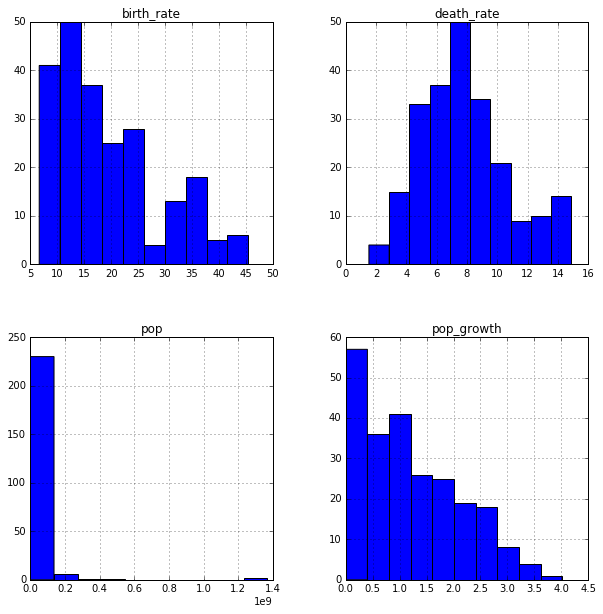

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

pd.read_sql_query(q5, conn).hist(ax=ax)

In [9]:
q6 = '''
select name, cast(population as float)/cast(area_land as float) pop_den
from facts
order by pop_den desc
limit 20
'''

pd.read_sql_query(q6, conn)

,name,pop_den
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


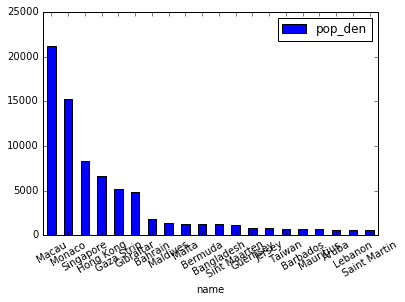

In [19]:
pd.read_sql_query(q6, conn).plot(kind='bar', x='name', rot=30)

In [11]:
q7 = '''
select name, cast(area_water as float)/cast(area_land as float) water_to_land
from facts
order by water_to_land desc
limit 20
'''
pd.read_sql_query(q7, conn)

,name,water_to_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [12]:
q8 = '''
select name, cast(area_land as float)/cast(area_water as float) land_to_water
from facts
order by land_to_water desc
limit 20
'''
pd.read_sql_query(q8, conn)

,name,land_to_water
0,Bosnia and Herzegovina,5118.700000
1,Niger,4222.333333
2,Morocco,1785.200000
3,Guinea,1755.121429
4,Costa Rica,1276.500000
5,Djibouti,1159.000000
6,"Korea, North",926.215385
7,Cyprus,924.100000
8,Namibia,821.646707
9,Burkina Faso,684.500000
